In [6]:
# install google chrome
!wget https://dl.google.com/linux/linux_signing_key.pub
!sudo apt-key add linux_signing_key.pub
!echo 'deb [arch=amd64] http://dl.google.com/linux/chrome/deb/ stable main' >> /etc/apt/sources.list.d/google-chrome.list
!sudo apt-get -y update
!sudo apt-get install -y google-chrome-stable

--2022-04-20 10:24:19--  https://dl.google.com/linux/linux_signing_key.pub
Resolving dl.google.com (dl.google.com)... 74.125.26.136, 74.125.26.91, 74.125.26.93, ...
Connecting to dl.google.com (dl.google.com)|74.125.26.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12415 (12K) [application/octet-stream]
Saving to: ‘linux_signing_key.pub’

linux_signing_key.p 100%[===================>]  12.12K  --.-KB/s    in 0s      

2022-04-20 10:24:19 (68.2 MB/s) - ‘linux_signing_key.pub’ saved [12415/12415]

OK
Get:1 http://dl.google.com/linux/chrome/deb stable InRelease [1811 B]
Hit:2 http://packages.cloud.google.com/apt gcsfuse-focal InRelease             
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 https://packages.cloud.google.com/apt cloud-sdk InRelease                
Get:5 http://dl.google.com/linux/chrome/deb stable/main amd64 Packages [1090 B]
Hit:6 https://packages.cloud.google.com/apt google-fast-socket 

In [7]:
# install chromedriver
# !apt-get install -y qq unzip
!wget -O /tmp/chromedriver.zip http://chromedriver.storage.googleapis.com/`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`/chromedriver_linux64.zip
!unzip /tmp/chromedriver.zip chromedriver -d /usr/local/bin/

--2022-04-20 10:24:38--  http://chromedriver.storage.googleapis.com/100.0.4896.60/chromedriver_linux64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 142.250.98.128, 2607:f8b0:400c:c1a::80
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|142.250.98.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6986125 (6.7M) [application/zip]
Saving to: ‘/tmp/chromedriver.zip’

/tmp/chromedriver.z 100%[===================>]   6.66M  --.-KB/s    in 0.1s    

2022-04-20 10:24:38 (57.2 MB/s) - ‘/tmp/chromedriver.zip’ saved [6986125/6986125]

Archive:  /tmp/chromedriver.zip
  inflating: /usr/local/bin/chromedriver  


In [8]:
# install selenium
!sudo apt install -y python3-selenium
!pip install selenium==3.141.0 > /dev/null

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  python3-selenium
0 upgraded, 1 newly installed, 0 to remove and 60 not upgraded.
Need to get 86.2 kB of archives.
After this operation, 588 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 python3-selenium all 4.0.0~a1+dfsg1-1.1 [86.2 kB]
Fetched 86.2 kB in 1s (119 kB/s)            

78Selecting previously unselected package python3-selenium.
(Reading database ... 108276 files and directories currently installed.)
Preparing to unpack .../python3-selenium_4.0.0~a1+dfsg1-1.1_all.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [ 20%] [###########...............................................] 8Unpacking python3-selenium (4.0.0~a1+dfsg1-1.1) ...
7Progress: [ 40%] [#######################...................................] 8Setting up py

In [10]:
# To check Chrome Driver's version
!chromedriver -v

ChromeDriver 100.0.4896.60 (6a5d10861ce8de5fce22564658033b43cb7de047-refs/branch-heads/4896@{#875})


In [96]:
# import libraries
import time
from PIL import Image


from selenium import webdriver
from selenium.webdriver.common.by import By

import pandas as pd
import numpy as np

In [139]:
# creating the driver object and loading the url

url = 'https://www.giiresearch.com/material_report.shtml'

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("--window-size=1920,1080")
driver = webdriver.Chrome(options=chrome_options)
driver.get(url)

In [179]:
# Next button

next_btn = driver.find_elements(By.XPATH,'//button[text() = "Next"]')

# creating an empty dataframe
# df = pd.DataFrame({'Report_Names':[],'Published_By':[],'Published_Date':[],'Product_Code':[],'Content_Info':[],'Price':[]})
# df

In [180]:
driver.implicitly_wait(10)

while next_btn:
    
#     Selecting all elements with features
    report_names = driver.find_elements(By.XPATH,'//div[@class = "list_title"]//descendant::a[1]')
    published_by = driver.find_elements(By.XPATH,'//div[@class="plist_pubinfo"]//descendant::div[2]')
    published_date = driver.find_elements(By.XPATH,'//div[@class="plist_dateinfo"]//descendant::div[2]')
    product_code = driver.find_elements(By.XPATH,'//div[@class="plist_codeinfo"]//descendant::div[2]')
    content_info = driver.find_elements(By.XPATH,'//div[@class="plist_pageinfo"]//descendant::div[2]')
    price = driver.find_elements(By.XPATH,'//div[@class="plist_priceinfo"]//descendant::span')
    
#     Extracting all text from above variables

    Report_Names = [i.text for i in report_names]
    Published_By = [i.text for i in published_by]
    Published_Date = [i.text for i in published_date]
    Product_Code = [i.text for i in product_code]
    Content_Info = [i.text for i in content_info]
    Price = [i.text for i in price]
    
#     adding null value at places where the price is missing

    indexes = []
    indexes.extend([Report_Names.index(i) for i in Report_Names if 'BCC Research Report Subscription' in i])
    indexes.extend([Report_Names.index(i) for i in Report_Names if 'TechSci Research Annual Subscription Package' in i])
    indexes.extend([Report_Names.index(i) for i in Report_Names if 'The Global Market for Metal and Metal Oxide Nanoparticles and Nanopowders 2020' in i])
    indexes.extend([Report_Names.index(i) for i in Report_Names if 'The Global Market for Nanomaterials and Nanomaterials-Based Products' in i])
    indexes.extend([Report_Names.index(i) for i in Report_Names if 'The Global Market for Nanotechnology and Nanomaterials in Cosmetics, Personal Care and Sunscreens' in i])
    indexes.extend([Report_Names.index(i) for i in Report_Names if 'The Global Market for Anti-icing and De-icing Nanocoatings' in i])
    indexes.extend([Report_Names.index(i) for i in Report_Names if 'The Global Market for Anti-Fouling and Easy-to-Clean Nanocoatings' in i])

    for i in indexes:
        Price.insert(i,np.NaN)
    
#     creating dataframe out of current page information

    df2 = pd.DataFrame({'Report_Names':Report_Names,
                  'Published_By':Published_By,
                  'Published_Date':Published_Date,
                  'Product_Code':Product_Code,
                  'Content_Info':Content_Info,
                  'Price':Price})
#     updating the main dataframe

    df = df.append(df2)
    
    next_btn[0].click()
    
    next_btn = driver.find_elements(By.XPATH,'//button[text() = "Next"]')
    
    print(df.shape[0], end = '---')

24800---24825---24850---24875---24900---24925---24950---24975---25000---25025---25050---25075---25100---25125---25150---25175---25200---25225---25250---25275---25300---25325---25350---25375---25400---25425---25450---25475---25500---25525---25550---25575---25600---

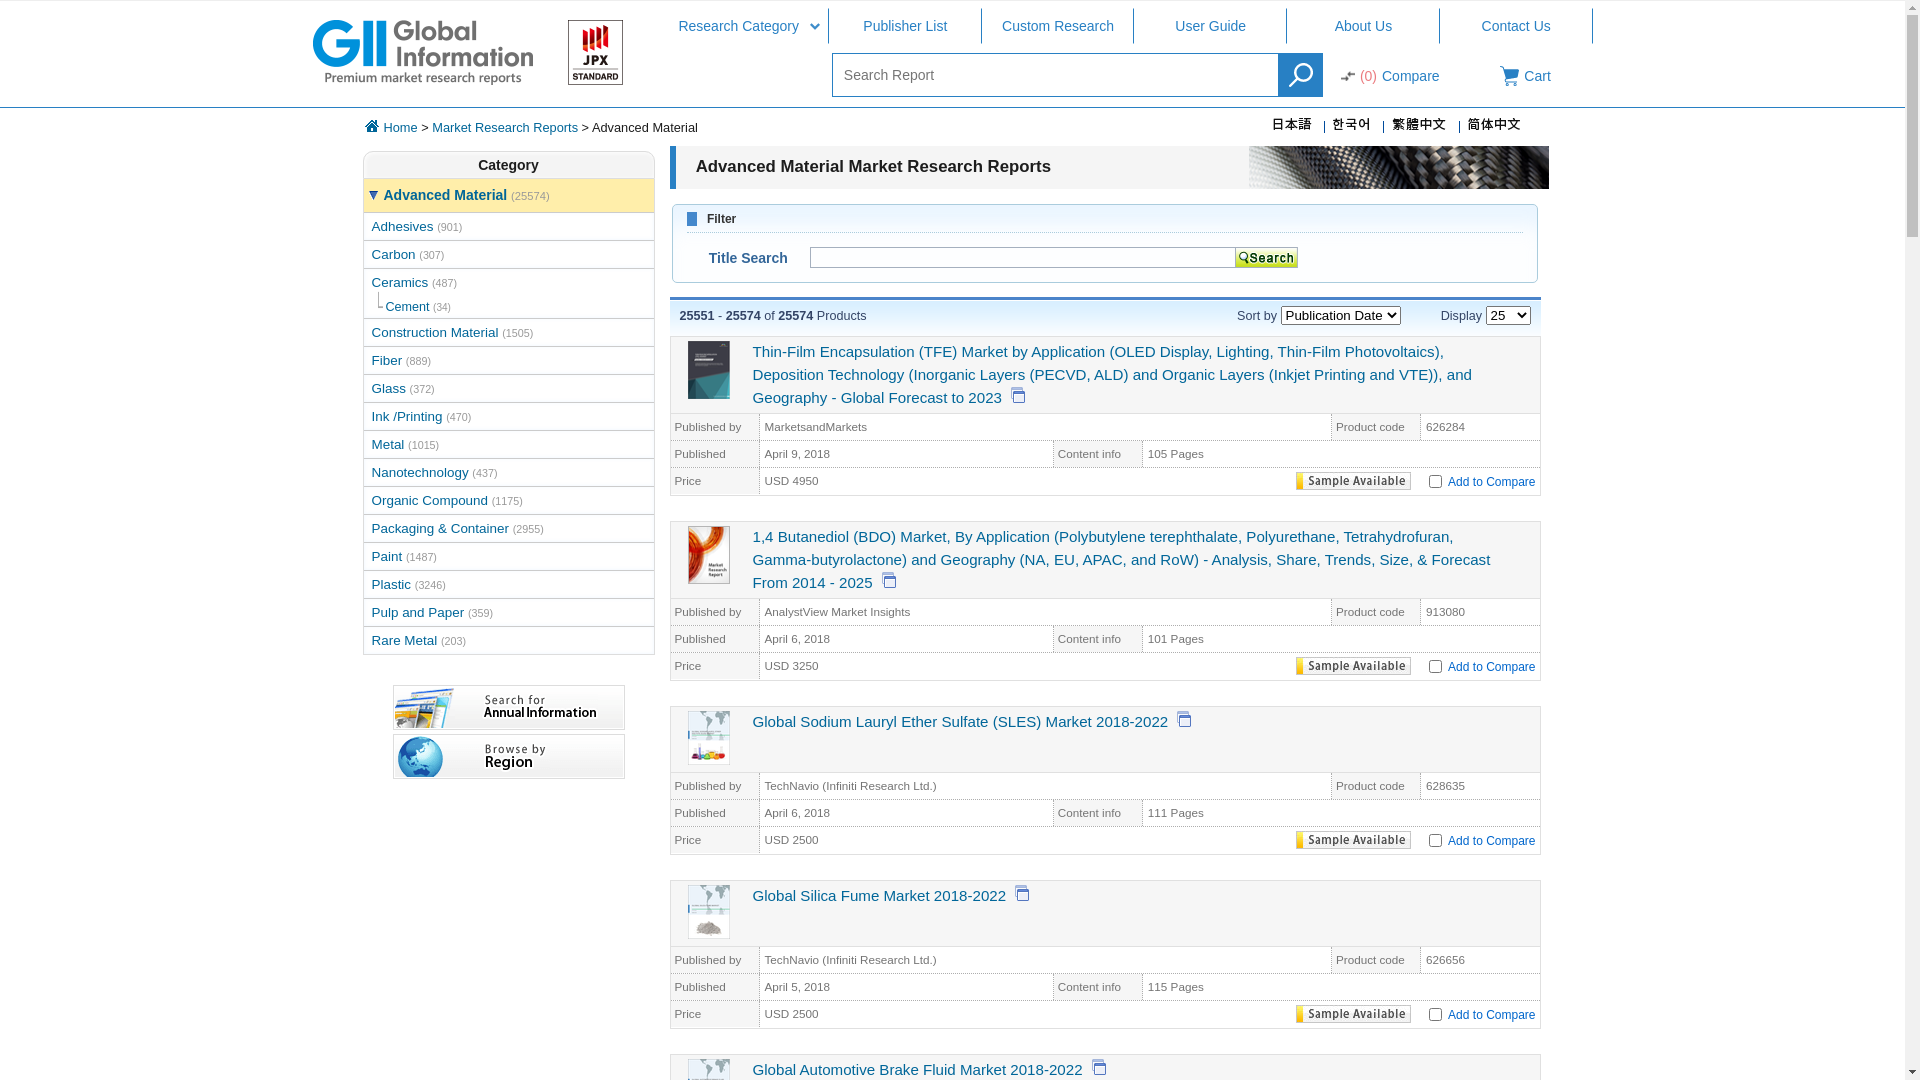

In [181]:
# take a picture
driver.save_screenshot('result.png')
img = Image.open('result.png')
img

In [186]:
df.head()

,Report_Names,Published_By,Published_Date,Product_Code,Content_Info,Price
0,Global Nano-Copper Particles Market Profession...,QYResearch,"April 20, 2022",1070481,103 Pages,USD 3500
1,"Global Monocrystalline Diamond Market Report, ...",QYResearch,"April 20, 2022",1070480,96 Pages,USD 3350
2,Global Industrial Inkjet Printheads Market Rep...,QYResearch,"April 20, 2022",1070478,102 Pages,USD 3350
3,Global Float Glass Market Research Report 2022,QYResearch,"April 20, 2022",1070476,151 Pages,USD 2900
4,Global Electrostatic Chucks (ESCs) In Semicond...,QYResearch,"April 20, 2022",1070474,135 Pages,USD 2900


In [189]:
df.to_csv('Advanced Material Market Research Reports.csv', index= False)

In [188]:
driver.quit()